In [97]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import warnings
import os

warnings.filterwarnings('ignore')
print(os.listdir("Data/"))
FAST_RUN = False

IMAGE_WIDTH=64
IMAGE_HEIGHT=64
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

['test1', 'train']


In [98]:
filenames = os.listdir("Data/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [99]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


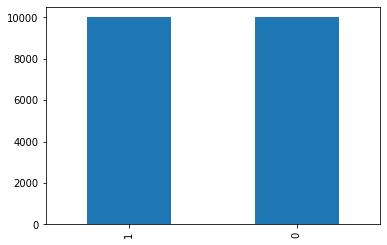

In [100]:
df['category'].value_counts().plot.bar()

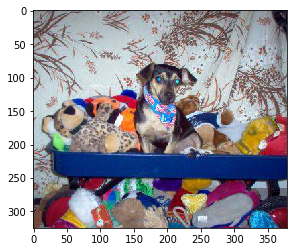

In [101]:
rastgeleOrnek = random.choice(filenames)
image = load_img("Data/train/"+rastgeleOrnek)
plt.imshow(image)

In [102]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'}) 
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
19995    dog
19996    dog
19997    dog
19998    dog
19999    dog
Name: category, Length: 20000, dtype: object

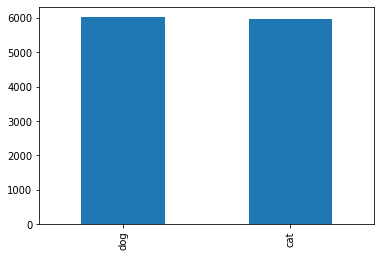

In [103]:
train_df, validate_df = train_test_split(df, test_size=0.40, random_state=42)
train_df['category'].value_counts().plot.bar()

In [104]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu',use_bias=True, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#fully connected işlemi, 2 hidden layers
model.add(Flatten())
model.add(Dense(512, activation = 'relu',use_bias=True))
model.add(Dense(2, activation = 'relu',use_bias=True))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               31490560  
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1026      
Total params: 31,493,378
Trainable params: 31,493,378
Non-trainable params: 0
_________________________________________________________________


In [105]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'}) 
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
19995    dog
19996    dog
19997    dog
19998    dog
19999    dog
Name: category, Length: 20000, dtype: object

In [106]:
train_df, test_df = train_test_split(df, test_size=0.40, random_state=42)

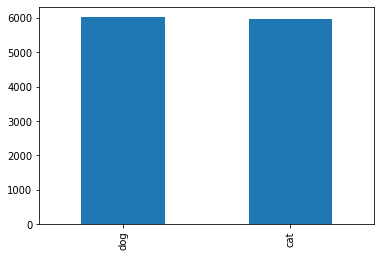

In [107]:
train_df['category'].value_counts().plot.bar()

In [108]:
total_train = train_df.shape[0]
total_train

12000

In [109]:
total_validate = test_df.shape[0]
total_validate

8000

In [110]:
batch_size=100

In [111]:
#Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
#Data augmentation
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "Data/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(   #data augmentation işlemi, gerçek veriye benzeyen imageler üretilir
    example_df,   #zoom, zoomin,zoomout resmin farklı yerine koyma, döndürme, sola sağa yatırma
    "Data/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 12000 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.


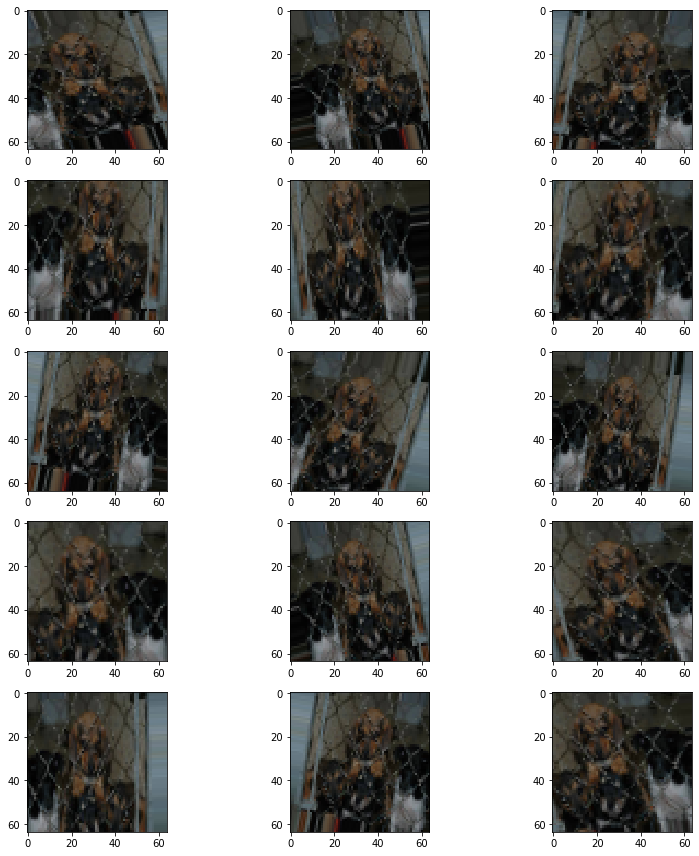

In [112]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [92]:
epochs=1 if FAST_RUN else 100 
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/100
120/120 [==============================] - 239s 2s/step - loss: 0.6970 - acc: 0.5415 - val_loss: 0.6623 - val_acc: 0.6247
Epoch 2/100
120/120 [==============================] - 115s 959ms/step - loss: 0.6719 - acc: 0.6213 - val_loss: 0.6061 - val_acc: 0.6890
Epoch 3/100
120/120 [==============================] - 82s 685ms/step - loss: 0.6563 - acc: 0.6631 - val_loss: 0.5786 - val_acc: 0.7062
Epoch 4/100
120/120 [==============================] - 78s 652ms/step - loss: 0.6265 - acc: 0.6813 - val_loss: 0.5660 - val_acc: 0.7296
Epoch 5/100
120/120 [==============================] - 78s 653ms/step - loss: 0.6252 - acc: 0.6776 - val_loss: 0.6537 - val_acc: 0.5869
Epoch 6/100
120/120 [==============================] - 78s 652ms/step - loss: 0.5847 - acc: 0.7008 - val_loss: 0.5781 - val_acc: 0.6898
Epoch 7/100
120/120 [==============================] - 78s 647ms/step - loss: 0.5932 - acc: 0.6960 - val_loss: 0.5428 - val_acc: 0.7505
Epoch 8/100
120/120 [============================

Epoch 61/100
120/120 [==============================] - 87s 722ms/step - loss: 0.5129 - acc: 0.7816 - val_loss: 0.6449 - val_acc: 0.7640
Epoch 62/100
120/120 [==============================] - 86s 716ms/step - loss: 0.5141 - acc: 0.7859 - val_loss: 0.7145 - val_acc: 0.7735
Epoch 63/100
120/120 [==============================] - 87s 723ms/step - loss: 0.4974 - acc: 0.7847 - val_loss: 0.5885 - val_acc: 0.7860
Epoch 64/100
120/120 [==============================] - 87s 721ms/step - loss: 0.4999 - acc: 0.7851 - val_loss: 0.5940 - val_acc: 0.7917
Epoch 65/100
120/120 [==============================] - 86s 716ms/step - loss: 0.5162 - acc: 0.7900 - val_loss: 0.6481 - val_acc: 0.7906
Epoch 66/100
120/120 [==============================] - 86s 714ms/step - loss: 0.4980 - acc: 0.7847 - val_loss: 0.8240 - val_acc: 0.7635
Epoch 67/100
120/120 [==============================] - 86s 720ms/step - loss: 0.5142 - acc: 0.7862 - val_loss: 0.6192 - val_acc: 0.7954
Epoch 68/100
120/120 [===================

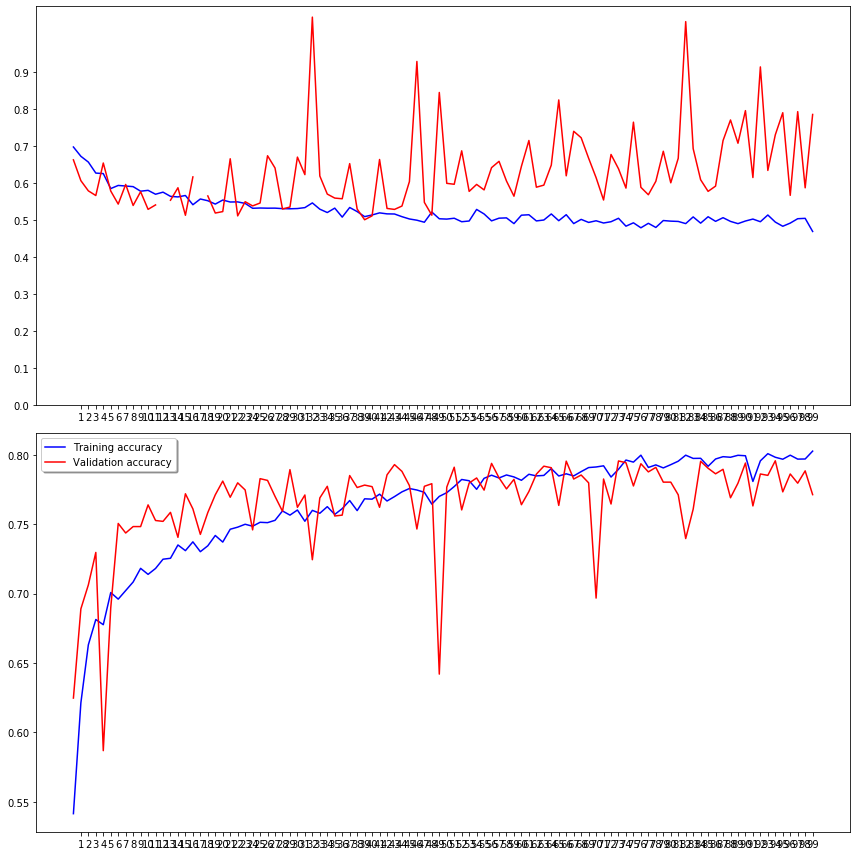

In [94]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
epochs=1 if FAST_RUN else 500 
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

Epoch 1/500
120/120 [==============================] - 149s 1s/step - loss: 0.5074 - acc: 0.8029 - val_loss: 1.0846 - val_acc: 0.7726
Epoch 2/500
120/120 [==============================] - 89s 743ms/step - loss: 0.4994 - acc: 0.7935 - val_loss: 0.8118 - val_acc: 0.7509
Epoch 3/500
120/120 [==============================] - 81s 679ms/step - loss: 0.4978 - acc: 0.8060 - val_loss: 0.8677 - val_acc: 0.7817
Epoch 4/500
120/120 [==============================] - 81s 675ms/step - loss: 0.5033 - acc: 0.8002 - val_loss: 0.6217 - val_acc: 0.7974
Epoch 5/500
120/120 [==============================] - 80s 669ms/step - loss: 0.4680 - acc: 0.8009 - val_loss: 1.3114 - val_acc: 0.7396
Epoch 6/500
120/120 [==============================] - 81s 677ms/step - loss: 0.4989 - acc: 0.8081 - val_loss: 1.0403 - val_acc: 0.7736
Epoch 7/500
120/120 [==============================] - 81s 672ms/step - loss: 0.4818 - acc: 0.8060 - val_loss: 0.8595 - val_acc: 0.7762
Epoch 8/500
120/120 [=============================

Epoch 61/500
120/120 [==============================] - 111s 926ms/step - loss: 0.4965 - acc: 0.8132 - val_loss: 0.9327 - val_acc: 0.7824
Epoch 62/500
120/120 [==============================] - 110s 915ms/step - loss: 0.4752 - acc: 0.8147 - val_loss: 0.7067 - val_acc: 0.8000
Epoch 63/500
120/120 [==============================] - 110s 914ms/step - loss: 0.5007 - acc: 0.8171 - val_loss: 0.9202 - val_acc: 0.7761
Epoch 64/500
120/120 [==============================] - 109s 911ms/step - loss: 0.5199 - acc: 0.8148 - val_loss: 0.7897 - val_acc: 0.7912
Epoch 65/500
120/120 [==============================] - 124s 1s/step - loss: 0.5006 - acc: 0.8166 - val_loss: 0.8615 - val_acc: 0.7922
Epoch 66/500
120/120 [==============================] - 124s 1s/step - loss: 0.4798 - acc: 0.8157 - val_loss: 0.8691 - val_acc: 0.7913
Epoch 67/500
120/120 [==============================] - 114s 952ms/step - loss: 0.4968 - acc: 0.8162 - val_loss: 1.0745 - val_acc: 0.7775
Epoch 68/500
120/120 [==================

In [113]:
test_filenames = os.listdir("Data/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [114]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "Data/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 8000 validated image filenames.


In [115]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [116]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

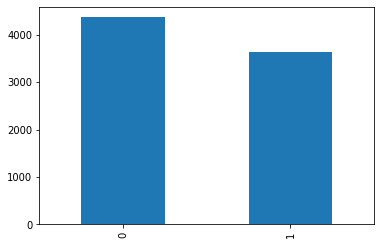

In [117]:
test_df['category'].value_counts().plot.bar()

In [118]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('Test_submission.csv', index=False)